## Agricultural Production Optimization Engine

By Shankar Wagh

In [ ]:
# Agricultural Production Optimization Engine

# Problem Statement
# Build a Predictive Model so as to suggest the most suitable crops to 
# grow based on the available Climitic and Soil condition

# Goal - To Achieve Precision Farming bt Optimising the Agricultural Production

# Precision Farming
# 1. we have to Optimiza Productivity
# 2. By Understanding requirements of Climatic and soil condition for Croms
# 3. Helps us Cope up with Whether Unpredictability

In [9]:
# for data manipulation
import numpy as np
import pandas as pd

# for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# for interactivity
from ipywidgets import interact

In [2]:
# Lets read datasets
data = pd.read_csv('data.csv')
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [3]:
# Lets check the shape of the dataset
print("Shape of the Dataset:", data.shape)

Shape of the Dataset: (2200, 8)


In [4]:
# lets check if there is any missing value present in the dataset
data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [5]:
# lets check the Crops presents in this Dataset
data['label'].value_counts()

jute           100
pigeonpeas     100
cotton         100
mothbeans      100
maize          100
coconut        100
chickpea       100
pomegranate    100
blackgram      100
grapes         100
muskmelon      100
mango          100
watermelon     100
banana         100
lentil         100
rice           100
mungbean       100
kidneybeans    100
orange         100
apple          100
papaya         100
coffee         100
Name: label, dtype: int64

In [6]:
# Lets Check summary Statistic of Dataset
data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [7]:
# lets check the summary for all crops

print('Average ratio of Nitrogen in the Soil : {0:.2f}'.format(data['N'].mean()))
print('Average ratio of Phosphourous in the Soil : {0:.2f}'.format(data['P'].mean()))
print('Average ratio of Potassiam in the Soil : {0:.2f}'.format(data['K'].mean()))
print('Average Temperature in Celsius  : {0:.2f}'.format(data['temperature'].mean()))
print('Average Relative humidity in % : {0:.2f}'.format(data['humidity'].mean()))
print('Average PH value of the soil : {0:.2f}'.format(data['ph'].mean()))
print('Average Rainfall in mm : {0:.2f}'.format(data['rainfall'].mean()))

Average ratio of Nitrogen in the Soil : 50.55
Average ratio of Phosphourous in the Soil : 53.36
Average ratio of Potassiam in the Soil : 48.15
Average Temperature in Celsius  : 25.62
Average Relative humidity in % : 71.48
Average PH value of the soil : 6.47
Average Rainfall in mm : 103.46


In [10]:
#  lets check the summary Statistic for each of the crops

@interact
def summary(crops = list(data['label'].value_counts().index)):
    x = data[data['label'] == crops]
    print('-----------------------------------')
    print("Statistics for Nitrogen")
    print('Minimum Nitrogen required :', x['N'].min())
    print('Average Nitrogen required :', x['N'].mean())
    print('Maximum Nitrogen required :', x['N'].max())
    print('-----------------------------------')    
    print("Statistics for Phosphorous")
    print('Minimum Phosphorous required :', x['P'].min())
    print('Average Phosphorous required :', x['P'].mean())
    print('Maximum Phosphorous required :', x['P'].max())
    print('-----------------------------------')    
    print("Statistics for Potassium")
    print('Minimum Potassium required :', x['K'].min())
    print('Average Potassium required :', x['K'].mean())
    print('Maximum Potassium required :', x['K'].max())
    print('-----------------------------------')    
    print("Statistics for Temperature")
    print('Minimum Temperature required :{0:.2f}'.format(x['temperature'].min()))
    print('Average Temperature required :{0:.2f}'.format(x['temperature'].mean()))
    print('Maximum Temperature required :{0:.2f}'.format(x['temperature'].max()))
    print('-----------------------------------')
    print("Statistics for Humidity")
    print('Minimum Humidity required :{0:.2f}'.format(x['humidity'].min()))
    print('Average Humidity required :{0:.2f}'.format(x['humidity'].mean()))
    print('Maximum Humidity required :{0:.2f}'.format(x['humidity'].max()))
    print('-----------------------------------')
    print("Statistics for PH")
    print('Minimum ph required :{0:.2f}'.format(x['ph'].min()))
    print('Average PH required :{0:.2f}'.format(x['ph'].mean()))
    print('Maximum PH required :{0:.2f}'.format(x['ph'].max()))
    print('-----------------------------------')
    print("Statistics for Rainfall")
    print('Minimum Rainfall required :{0:.2f}'.format(x['rainfall'].min()))
    print('Average Rainfall required :{0:.2f}'.format(x['rainfall'].mean()))
    print('Maximum Rainfall required :{0:.2f}'.format(x['rainfall'].max()))

interactive(children=(Dropdown(description='crops', options=('jute', 'pigeonpeas', 'cotton', 'mothbeans', 'mai…

In [11]:
#  lets compare the Average Requirement for each crops with average condition

@interact
def compare(condition = ['N','P','K', 'temperature','ph','humidity','rainfall']):
    print("Average Value for",condition,"is {0:.2f}".format(data[condition].mean()))
    print("---------------------------------------------------------")
    print("Rice :{0:.2f}".format(data[(data['label'] == 'rice')][condition].mean()))
    print('Black Grams :{0:.2f}'.format(data[(data['label'] == 'blackgram')][condition].mean()))
    print('Banana :{0:.2f}'.format(data[(data['label'] == 'banana')][condition].mean()))
    print('Jute :{0:.2f}'.format(data[data["label"]=='jute'][condition].mean()))
    print("Coconut :{0:.2f}".format(data[data['label'] == 'coconut'][condition].mean()))
    print("Apple :{0:.2f}".format(data[data['label'] == 'apple'][condition].mean()))
    print('Papaya :{0:.2f}'.format(data[data['label'] == 'papaya'][condition].mean()))
    print("Muskmelon :{0:.2f}".format(data[data['label']=='muskmelon'][condition].mean()))
    print("Grapes :{0:.2f}".format(data[(data['label'] == 'grapes')][condition].mean()))
    print('Watermelon :{0:.2f}'.format(data[(data['label'] == 'watermelon')][condition].mean()))
    print('Kidney Beans :{0:.2f}'.format(data[(data['label'] == 'kidneybeans')][condition].mean()))
    print('Mung Beans :{0:.2f}'.format(data[data["label"]=='mungbean'][condition].mean()))
    print("Oranges :{0:.2f}".format(data[data['label'] == 'orange'][condition].mean()))
    print("Chick Peas :{0:.2f}".format(data[data['label'] == 'chickpea'][condition].mean()))
    print('Lentils :{0:.2f}'.format(data[data['label'] == 'lentil'][condition].mean()))
    print("Cotton :{0:.2f}".format(data[data['label']=='cotton'][condition].mean())) 
    
    print('Maize :{0:.2f}'.format(data[(data['label'] == 'maize')][condition].mean()))
    print('Moth Beans :{0:.2f}'.format(data[data["label"]=='mothbeans'][condition].mean()))
    print("Pigeon Peas :{0:.2f}".format(data[data['label'] == 'pigeonpeas'][condition].mean()))
    print("Mango :{0:.2f}".format(data[data['label'] == 'mango'][condition].mean()))
    print('Pomgranate :{0:.2f}'.format(data[data['label'] == 'pomegranate'][condition].mean()))
    print("Coffee :{0:.2f}".format(data[data['label']=='coffee'][condition].mean()))

interactive(children=(Dropdown(description='condition', options=('N', 'P', 'K', 'temperature', 'ph', 'humidity…

In [12]:
#  lets make this function more Intuitive

@interact
def compare(conditions = ['N','P','K','temperature','ph','humidity','rainfall']):
    print('Crops which require greater than average', conditions,'\n')
    print(data[data[conditions]> data[conditions].mean()]['label'].unique())
    print("------------------------------------------------------------")
    print("Crops which require less than average",conditions,'\n')
    print(data[data[conditions] <= data[conditions].mean()]['label'].unique())

interactive(children=(Dropdown(description='conditions', options=('N', 'P', 'K', 'temperature', 'ph', 'humidit…

In [13]:
@interact
def distplot(conditions = ['N','P','K','temperature','ph','humidity','rainfall']):
    print('distribution plot fot',conditions,)
    print(sns.distplot(data[conditions]))

interactive(children=(Dropdown(description='conditions', options=('N', 'P', 'K', 'temperature', 'ph', 'humidit…

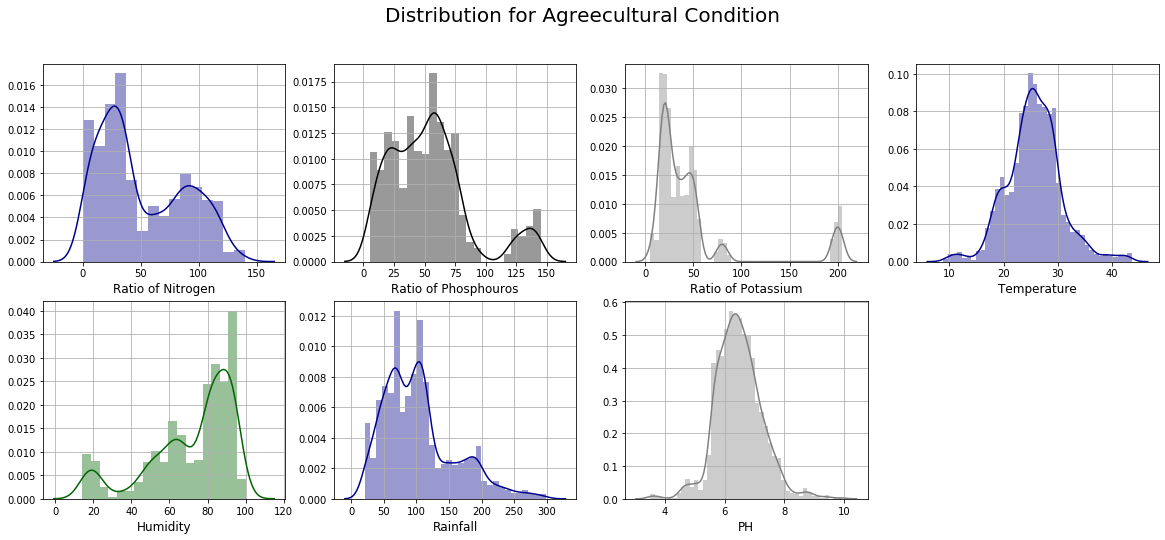

In [14]:
# lets plot the distribustion of each variable
plt.figure(figsize =(20,8))
plt.subplot(2,4,1)
sns.distplot(data['N'], color = 'darkblue')
plt.xlabel('Ratio of Nitrogen', fontsize = 12)
plt.grid()

plt.subplot(2,4,2)
sns.distplot(data['P'], color = 'black')
plt.xlabel('Ratio of Phosphouros', fontsize = 12)
plt.grid()

plt.subplot(2,4,3)
sns.distplot(data['K'], color = 'grey')
plt.xlabel('Ratio of Potassium', fontsize = 12)
plt.grid()

plt.subplot(2,4,4)
sns.distplot(data['temperature'], color = 'darkblue')
plt.xlabel('Temperature', fontsize = 12)
plt.grid()

plt.subplot(2,4,5)
sns.distplot(data['humidity'], color = 'darkgreen')
plt.xlabel('Humidity', fontsize = 12)
plt.grid()

plt.subplot(2,4,6)
sns.distplot(data['rainfall'], color = 'darkblue')
plt.xlabel('Rainfall', fontsize = 12)
plt.grid()

plt.subplot(2,4,7)
sns.distplot(data['ph'], color = 'grey')
plt.xlabel('PH', fontsize = 12)
plt.grid()

plt.suptitle('Distribution for Agreecultural Condition', fontsize = 20)
plt.show()

In [15]:
# lets find out some Interesting facts

print("Some Interesting Pattern")
print("------------------------------------------------------------------")
print("Crops which require very High ratio of Nitrogen Content in Soil:", data[data['N'] > 120]['label'].unique())
print("Crops which require very High Phosphorous Content in Soil:", data[data["P"]>100]['label'].unique())
print("Crops which require very High Potassium Content in Soil:", data[data['K']>200]['label'].unique())
print("Crops which require very High rainfall:", data[data['rainfall'] > 200]['label'].unique())
print("Crops which require very Low Temperature:", data[data["temperature"]<10]['label'].unique())
print("Crops which require very High Temperature:", data[data['temperature']>40]['label'].unique())
print("Crops which require very Low Humidity:", data[data['humidity'] < 20]['label'].unique())
print("Crops which require very Low PH:", data[data["ph"] < 4]['label'].unique())
print("Crops which require very High PH:", data[data['ph']>9]['label'].unique())

Some Interesting Pattern
------------------------------------------------------------------
Crops which require very High ratio of Nitrogen Content in Soil: ['cotton']
Crops which require very High Phosphorous Content in Soil: ['grapes' 'apple']
Crops which require very High Potassium Content in Soil: ['grapes' 'apple']
Crops which require very High rainfall: ['rice' 'papaya' 'coconut']
Crops which require very Low Temperature: ['grapes']
Crops which require very High Temperature: ['grapes' 'papaya']
Crops which require very Low Humidity: ['chickpea' 'kidneybeans']
Crops which require very Low PH: ['mothbeans']
Crops which require very High PH: ['mothbeans']


In [16]:
#  lets Understand which crops can only grown in Summer Season, Winter Season and Rainy Season

print("Summer Crops")
print(data[(data['temperature'] > 30) & (data['humidity'] >50)]['label'].unique())
print("-----------------------------------------------------------")
print('Winter Season')
print(data[(data['temperature'] < 20) & (data['humidity'] >30)]['label'].unique())
print("-------------------------------------------------------------")
print('Rainy Season')
print(data[(data['rainfall'] > 200) & (data['humidity'] > 30)]['label'].unique())

Summer Crops
['pigeonpeas' 'mothbeans' 'blackgram' 'mango' 'grapes' 'orange' 'papaya']
-----------------------------------------------------------
Winter Season
['maize' 'pigeonpeas' 'lentil' 'pomegranate' 'grapes' 'orange']
-------------------------------------------------------------
Rainy Season
['rice' 'papaya' 'coconut']


In [17]:
from sklearn.cluster import KMeans
# Removing the labels column
x = data.drop(['label'],axis = 1)

# selecting all value of the data
x = x.values

# Chwcking the shape
print(x.shape)

(2200, 7)


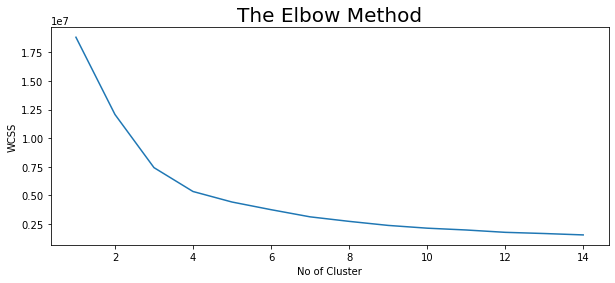

In [18]:
# lets determine the optimum Number of cluster within dataset
plt.rcParams['figure.figsize'] = (10,4)

wcss = []
for i in range(1,15):
    km = KMeans(n_clusters= i, init='k-means++',max_iter=300, n_init = 10, random_state = 0)
    km.fit(x)
    wcss.append(km.inertia_)
    
# lets plot the result
plt.plot(range(1,15),wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No of Cluster')
plt.ylabel('WCSS')
plt.show()

In [19]:
# lets implement the K-Means algoritum to perform Clustering analysis
km = KMeans(n_clusters = 4, init = 'k-means++',max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)
# lets find out the Result
a = data['label']
y_means = pd.DataFrame(y_means)
z = pd.concat([y_means, a], axis = 1)
z = z.rename(columns = {0:'cluster'})

# lets check the cluster of each crops
print("lets check the Result After Applyig the K-Means Clustering Analysis\n")
print("Crops in First Cluster:", z[z['cluster'] == 0]['label'].unique())
print("------------------------------------------------------------------\n")
print("Crops in Second Cluster:", z[z['cluster'] == 1]['label'].unique())
print("------------------------------------------------------------------\n")
print("Crops in Third Cluster:", z[z['cluster'] == 2]['label'].unique())
print("------------------------------------------------------------------\n")
print("Crops in Fourth Cluster:", z[z['cluster'] == 3]['label'].unique())
print("------------------------------------------------------------------")

lets check the Result After Applyig the K-Means Clustering Analysis

Crops in First Cluster: ['maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans' 'mungbean'
 'blackgram' 'lentil' 'pomegranate' 'mango' 'orange' 'papaya' 'coconut']
------------------------------------------------------------------

Crops in Second Cluster: ['maize' 'banana' 'watermelon' 'muskmelon' 'papaya' 'cotton' 'coffee']
------------------------------------------------------------------

Crops in Third Cluster: ['grapes' 'apple']
------------------------------------------------------------------

Crops in Fourth Cluster: ['rice' 'pigeonpeas' 'papaya' 'coconut' 'jute' 'coffee']
------------------------------------------------------------------


## Making Predictive Model

In [29]:
# lets split the Dataset for Predictive modelling

X = data.drop(['label'], axis = 1)
y = data['label']


In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)


In [31]:
# lets create a Predictive Model

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

C:\Users\Shankar Wagh SNR\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Shankar Wagh SNR\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


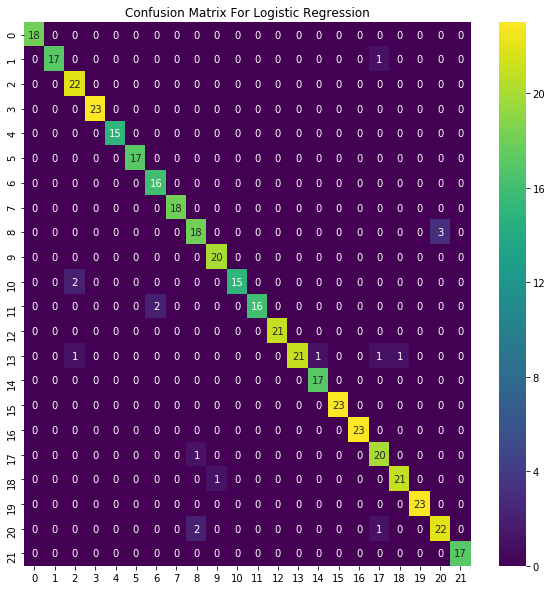

In [32]:
# lets Evaluate The Model Performance
from sklearn.metrics import confusion_matrix

# lets print the confusion matrix
plt.rcParams['figure.figsize']=(10,10)
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot = True, cmap = 'viridis')
plt.title('Confusion Matrix For Logistic Regression')
plt.show()

In [33]:
# lets print Classification Report
from sklearn.metrics import classification_report
cr = classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        18
      banana       1.00      0.94      0.97        18
   blackgram       0.88      1.00      0.94        22
    chickpea       1.00      1.00      1.00        23
     coconut       1.00      1.00      1.00        15
      coffee       1.00      1.00      1.00        17
      cotton       0.89      1.00      0.94        16
      grapes       1.00      1.00      1.00        18
        jute       0.86      0.86      0.86        21
 kidneybeans       0.95      1.00      0.98        20
      lentil       1.00      0.88      0.94        17
       maize       1.00      0.89      0.94        18
       mango       1.00      1.00      1.00        21
   mothbeans       1.00      0.84      0.91        25
    mungbean       0.94      1.00      0.97        17
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        23
      papaya       0.87    

In [42]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train,y_train)

C:\Users\Shankar Wagh SNR\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [44]:
y_pred = rf_model.predict(X_test)

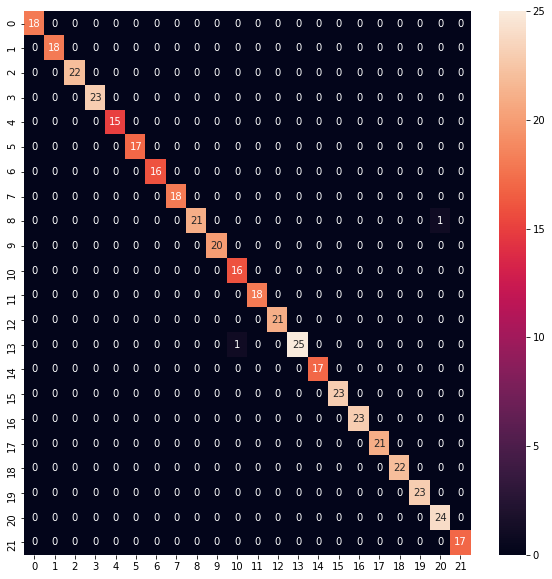

In [46]:
conf_matrix = confusion_matrix(y_pred,y_test)
sns.heatmap(conf_matrix, annot = True)

In [49]:
class_report = classification_report(y_pred,y_test)
print(class_report)

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        18
      banana       1.00      1.00      1.00        18
   blackgram       1.00      1.00      1.00        22
    chickpea       1.00      1.00      1.00        23
     coconut       1.00      1.00      1.00        15
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        16
      grapes       1.00      1.00      1.00        18
        jute       1.00      0.95      0.98        22
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.94      1.00      0.97        16
       maize       1.00      1.00      1.00        18
       mango       1.00      1.00      1.00        21
   mothbeans       1.00      0.96      0.98        26
    mungbean       1.00      1.00      1.00        17
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        23
      papaya       1.00    

In [50]:
import joblib
joblib.dump('final_OAPE.pkl',rf_model)

ValueError: Second argument should be a filename or a file-like object, RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False) (type <class 'sklearn.ensemble.forest.RandomForestClassifier'>) was given.